In [1]:
# lIBS

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

c:\Users\Caio\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### 1 -> Churn
### 2 -> Non Churned 

In [3]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname',], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [5]:
df.shape

(10000, 15)

In [6]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [8]:
from utils import CardTypetoInt, GendertoInt

df['Card Type'] = df['Card Type'].apply(CardTypetoInt)
df['Gender'] = df['Gender'].apply(GendertoInt)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,4,464
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,4,456
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,4,377
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,2,350
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,2,425


In [9]:
# 4 -> Diamond
# 3 -> Platinum
# 2 -> Gold
# 1 -> Silver

In [10]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,2.501300,606.515100
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,1.118357,225.924839
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,1.000000,119.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,2.000000,410.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,3.000000,605.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,4.000000,801.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,4.000000,1000.000000


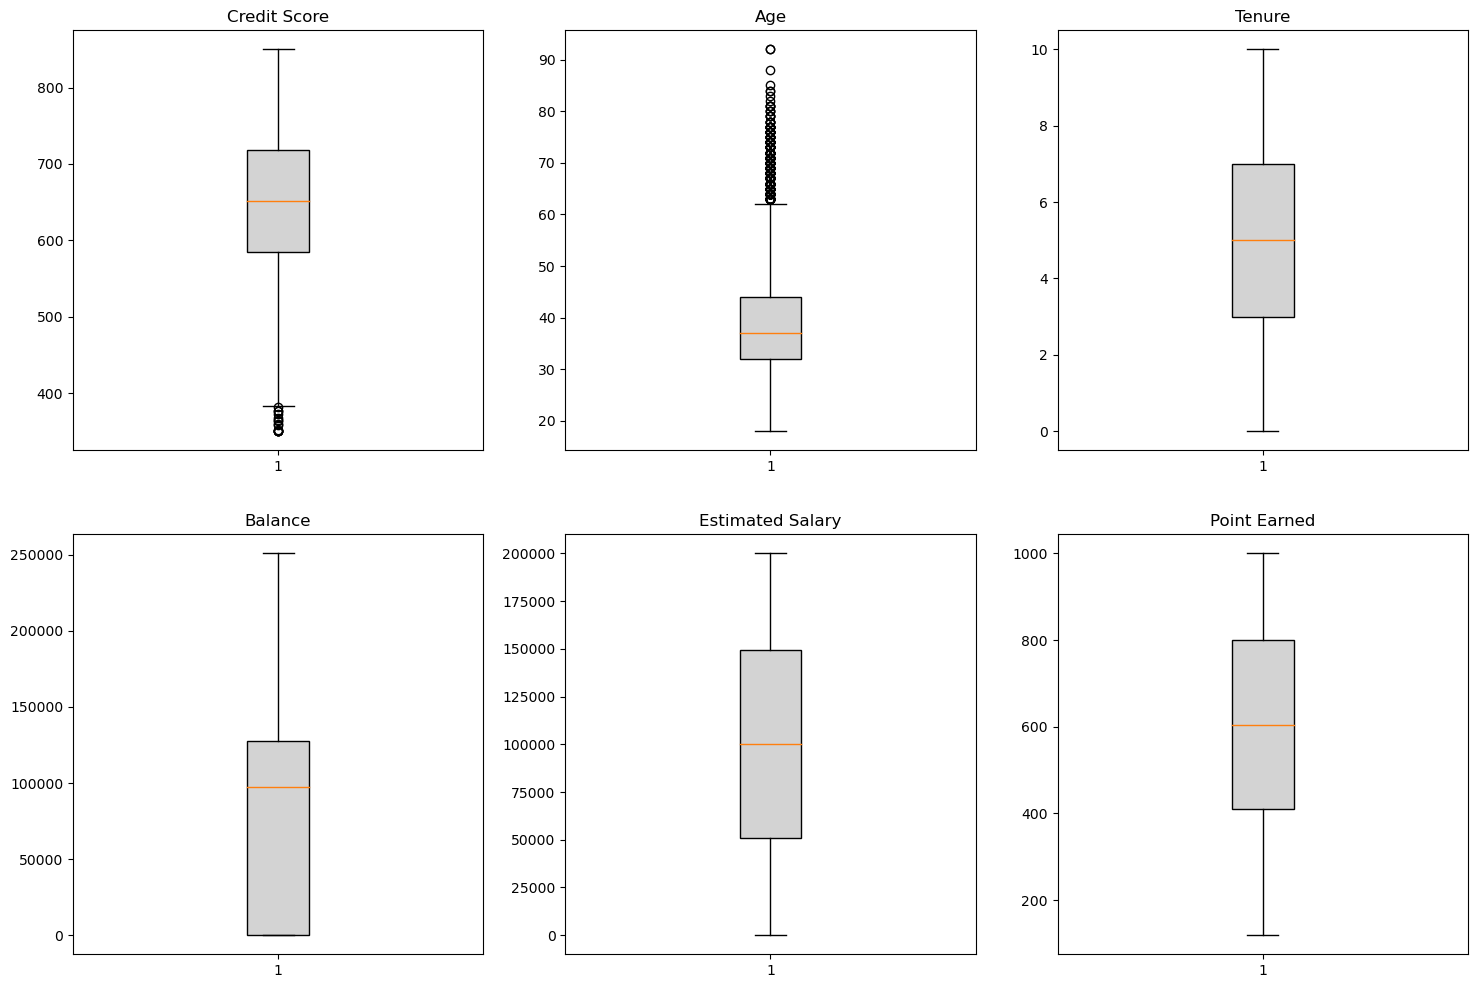

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(18,12))

axs[0,0].boxplot(df["CreditScore"], patch_artist=True, boxprops=dict(facecolor="lightgray"))
axs[0,0].set_title('Credit Score')

axs[0,1].boxplot(df["Age"], patch_artist=True, boxprops=dict(facecolor="lightgray"))
axs[0,1].set_title('Age')

axs[0,2].boxplot(df["Tenure"], patch_artist=True, boxprops=dict(facecolor="lightgray"))
axs[0,2].set_title('Tenure')

axs[1,0].boxplot(df["Balance"], patch_artist=True, boxprops=dict(facecolor="lightgray"))
axs[1,0].set_title('Balance')

axs[1,1].boxplot(df["EstimatedSalary"], patch_artist=True, boxprops=dict(facecolor="lightgray"))
axs[1,1].set_title('Estimated Salary')

axs[1,2].boxplot(df["Point Earned"], patch_artist=True, boxprops=dict(facecolor="lightgray"))
axs[1,2].set_title('Point Earned')

plt.show()


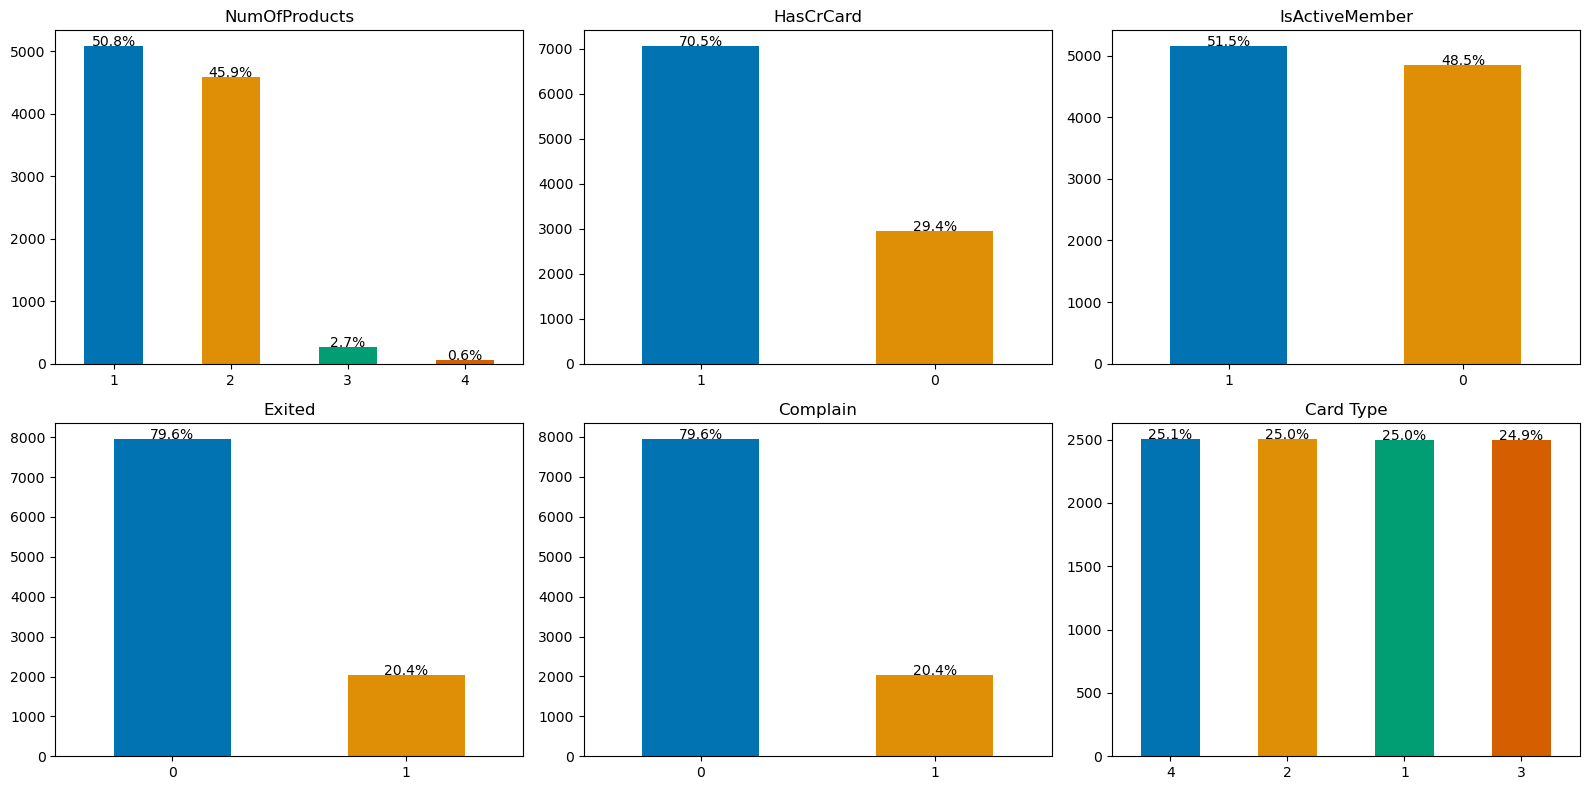

In [12]:
pallete = sns.color_palette('colorblind')

fig, axs = plt.subplots(2, 3, figsize=(16,8))

categorical_feature = ["NumOfProducts", "HasCrCard", "IsActiveMember", "Exited", "Complain", "Card Type"]

for i, var in enumerate(categorical_feature):
    row = i // 3
    column = i % 3

    values_counts = df[var].value_counts()
    values_counts.plot(kind='bar', ax=axs[row, column], color=pallete)
    axs[row, column].set_title(var)
    axs[row, column].set_xlabel('')
    axs[row, column].tick_params(axis='x', rotation=0) 

    total = values_counts.sum()
    for index, value in enumerate(values_counts):
        porcentagem = (value / total) * 100
        axs[row, column].text(index, value + 0.5, f'{porcentagem:.1f}%', ha='center') 
    
plt.tight_layout()
plt.show()

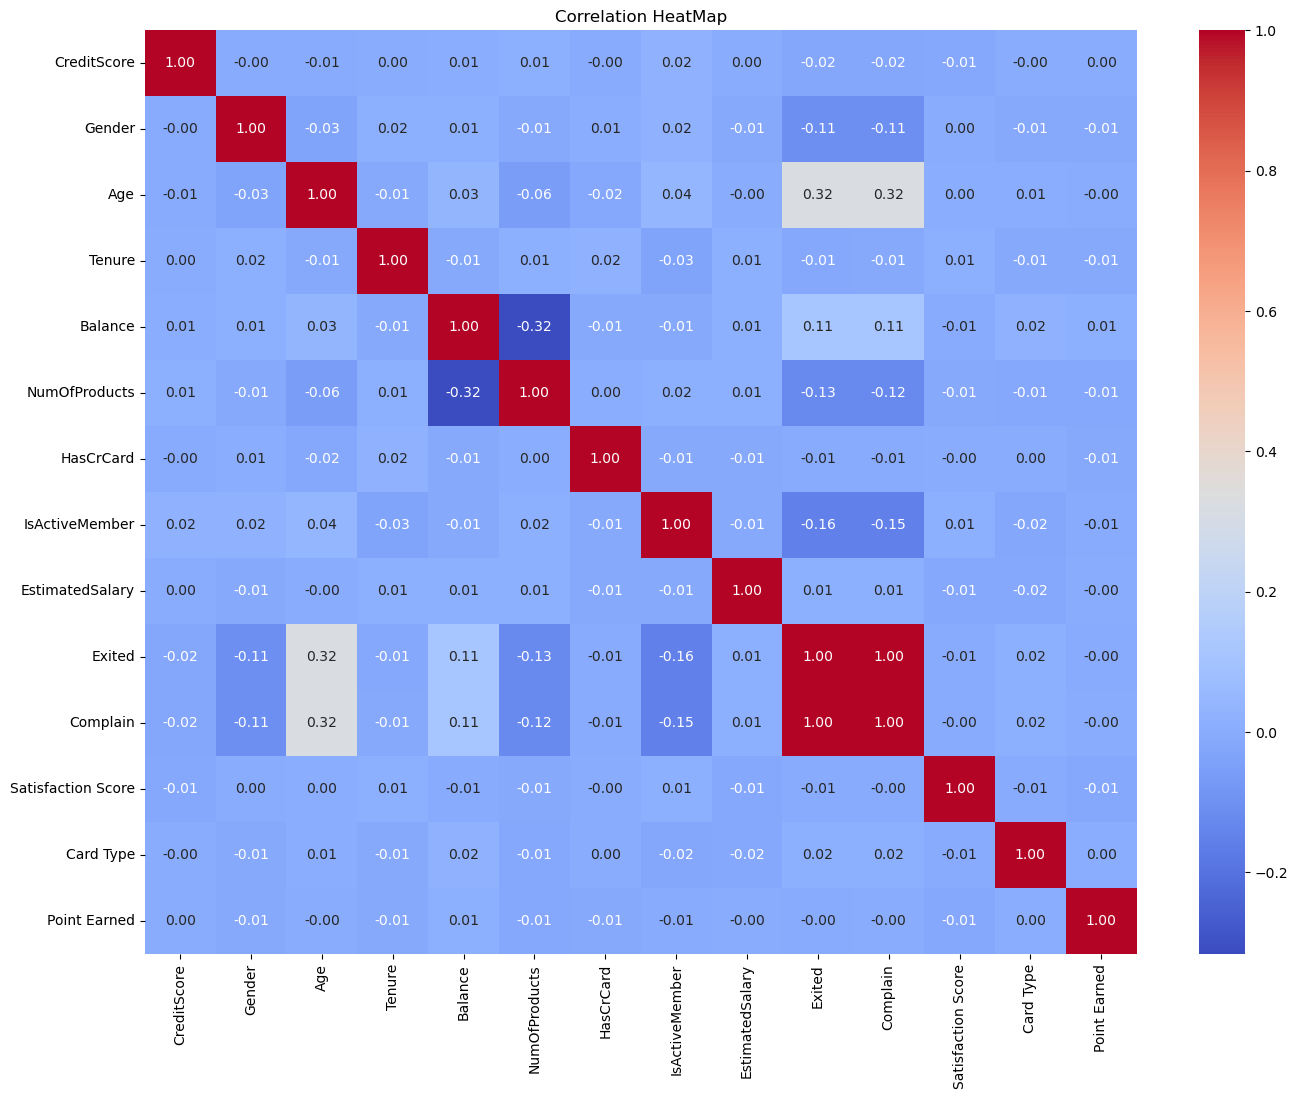

In [13]:
correlation = df.select_dtypes(include=['number']).corr(method='spearman')

plt.figure(figsize=(16,12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation HeatMap")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Exited", "Geography"])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.43      0.08      0.13       393

    accuracy                           0.80      2000
   macro avg       0.62      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

[[1568   39]
 [ 363   30]]


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(penalty='l2', solver='lbfgs')

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]} 

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Data with Best Hyperparameters:", test_accuracy)

Best Hyperparameters: {'C': 0.001}
Best Cross-Validation Accuracy: 0.787
Accuracy on Test Data with Best Hyperparameters: 0.799


In [32]:
import pickle

with open('model.pkl', 'wb') as arc:
    pickle.dump(model, arc)